In [33]:
import sys
import os
import pathlib
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from functools import partial

sys.path.extend(["../", "../mindset"])

import numpy as np
import torch
import torchvision.transforms as transforms
import timm
import pandas as pd
from mindset.src.utils.similarity_judgment.generate_report import generate_report
from mindset.src.utils.similarity_judgment.run import compute_distance
from mindset.src.utils.similarity_judgment.activation_recorder import RecordDistance

## Models

In [44]:
RESULTS_ROOT = "../data/results"

def init_model(model_name, device='auto', verbose=False):
    if device == 'auto':
        device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

    model = timm.create_model(  # type: ignore
        model_name, pretrained=True, cache_dir="../data/models/"
    ).to(device)

    if verbose: print(model)

    return model

def get_transforms():
    norm_values = dict(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.262])
    resize_value = 224

    # get_user_attributes(model)
    transform_fn = transforms.Compose([
        transforms.Resize(resize_value),
        transforms.ToTensor(),
        transforms.Normalize(norm_values['mean'], norm_values['std'])
    ])

    return transform_fn

def record_from_model(model, transform_fn, annotations_file, metric):
    model = model_name, net
    results_folder = os.path.join(RESULTS_ROOT, model_name)
    os.makedirs(results_folder, exist_ok=True)
    
    recorder = RecordDistance(
        annotations_file,
        match_factors=["Id"],
        non_match_factors=[],  # don't know what this should be
        factor_variable="Class",
        reference_level="basis",
        filter_factor_level={},
        distance_metric=metric,
        net=net,
        only_save=["Conv2d", "Linear"],
    )

    distance_df, layer_names = recorder.compute_from_annotation(
        transform_fn,
        matching_transform=True,
        fill_bk=[0, 0, 0],
        transf_boundaries={  # type: ignore
            'translation_X': [-0.2, 0.2],
            'translation_Y': [-0.2, 0.2],
            'scale': [1.0, 1.5],
            'rotation': [0, 360],
        },
        transformed_repetition=20,
        path_save_fig=results_folder,
        add_columns=[],
    )

    distance_df.to_csv(os.path.join(results_folder, f"{metric}_df.csv"))

    return distance_df

In [3]:
model_list = [
    "resnet50d",
    "resnet101",
    "convnextv2_base",
    "deit3_base_patch16_224",
    "focalnet_base_lrf",
    # "swinv2_base_window12to16_192to256",
    "resnext101_32x16d",
]

EXAMPLE_ANNOTATION = "../data/low_mid_level_vision/relational_vs_coordinate/annotation.csv"

In [4]:
models = list(map(init_model, model_list))

In [5]:
transform_fn = get_transforms()
metric = 'cossim'
dataframes = [record_from_model((m, n), transform_fn, EXAMPLE_ANNOTATION, metric) for (m, n) in zip(models, model_list)]

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                               | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                           | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|██▌                                                | 1/20 [00:00<00:03,  5.05it/s]

ormation rep.:  15%|███████▋                                           | 3/20 [00:00<00:01, 11.27it/s]

ormation rep.:  25%|████████████▊                                      | 5/20 [00:00<00:01,  9.07it/s]

ormation rep.:  40%|████████████████████▍                              | 8/20 [00:00<00:00, 12.87it/s]

ormation rep.:  50%|█████████████████████████                         | 10/20 [00:00<00:00, 14.30it/s]

ormation rep.:  60%|██████████████████████████████                    | 12/20 [00:00<00:00, 15.39it/s]

ormation rep.:  70%|███████████████████████████████████               | 14/20 [00:01<00:00, 15.84it/s]

ormation rep.:  80%|████████████████████████████████████████ 

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                               | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                           | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|██▌                                                | 1/20 [00:00<00:02,  8.02it/s]

ormation rep.:  15%|███████▋                                           | 3/20 [00:00<00:01, 10.20it/s]

ormation rep.:  25%|████████████▊                                      | 5/20 [00:00<00:01,  8.46it/s]

ormation rep.:  35%|█████████████████▊                                 | 7/20 [00:00<00:01,  9.57it/s]

ormation rep.:  45%|██████████████████████▉                            | 9/20 [00:00<00:01, 10.36it/s]

ormation rep.:  55%|███████████████████████████▌                      | 11/20 [00:01<00:00, 11.42it/s]

ormation rep.:  65%|████████████████████████████████▌                 | 13/20 [00:01<00:00, 12.18it/s]

ormation rep.:  75%|█████████████████████████████████████▌   

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                               | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                           | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|██▌                                                | 1/20 [00:00<00:14,  1.31it/s]

ormation rep.:  10%|█████                                              | 2/20 [00:01<00:13,  1.38it/s]

ormation rep.:  15%|███████▋                                           | 3/20 [00:02<00:12,  1.34it/s]

ormation rep.:  20%|██████████▏                                        | 4/20 [00:03<00:12,  1.25it/s]

ormation rep.:  25%|████████████▊                                      | 5/20 [00:03<00:11,  1.26it/s]

ormation rep.:  30%|███████████████▎                                   | 6/20 [00:04<00:10,  1.31it/s]

ormation rep.:  35%|█████████████████▊                                 | 7/20 [00:05<00:09,  1.34it/s]

ormation rep.:  40%|████████████████████▍                    

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                               | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                           | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|██▌                                                | 1/20 [00:00<00:03,  5.38it/s]

ormation rep.:  10%|█████                                              | 2/20 [00:00<00:02,  6.61it/s]

ormation rep.:  15%|███████▋                                           | 3/20 [00:00<00:02,  7.34it/s]

ormation rep.:  20%|██████████▏                                        | 4/20 [00:00<00:02,  7.75it/s]

ormation rep.:  25%|████████████▊                                      | 5/20 [00:00<00:02,  6.21it/s]

ormation rep.:  30%|███████████████▎                                   | 6/20 [00:00<00:02,  6.93it/s]

ormation rep.:  35%|█████████████████▊                                 | 7/20 [00:00<00:01,  7.43it/s]

ormation rep.:  40%|████████████████████▍                    

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                               | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                           | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|██▌                                                | 1/20 [00:00<00:17,  1.08it/s]

ormation rep.:  10%|█████                                              | 2/20 [00:01<00:16,  1.12it/s]

ormation rep.:  15%|███████▋                                           | 3/20 [00:02<00:15,  1.09it/s]

ormation rep.:  20%|██████████▏                                        | 4/20 [00:03<00:14,  1.11it/s]

ormation rep.:  25%|████████████▊                                      | 5/20 [00:04<00:13,  1.08it/s]

ormation rep.:  30%|███████████████▎                                   | 6/20 [00:05<00:12,  1.09it/s]

ormation rep.:  35%|█████████████████▊                                 | 7/20 [00:06<00:11,  1.09it/s]

ormation rep.:  40%|████████████████████▍                    

Network put in eval mode in Record Activation


parison Pairs:   0%|                                                                                                                                                                           | 0/6 [00:00<?, ?it/s]

ormation rep.:   0%|                                                                                                                                                                       | 0/20 [00:00<?, ?it/s]

ormation rep.:   5%|███████▉                                                                                                                                                       | 1/20 [00:00<00:08,  2.18it/s]

ormation rep.:  10%|███████████████▉                                                                                                                                               | 2/20 [00:00<00:06,  2.60it/s]

ormation rep.:  15%|███████████████████████▊                                                                                                         

In [60]:
df

,Unnamed: 0,ComparisonLevel,Id,TransformerRep,0: Conv2d,4: Conv2d,7: Conv2d,12: Conv2d,15: Conv2d,17: Conv2d,...,343: Conv2d,348: Conv2d,351: Conv2d,353: Conv2d,356: Conv2d,361: Conv2d,364: Conv2d,367: Conv2d,372: Conv2d,377: Linear
0,0,coordinate_change,1,0,0.740558,0.950526,0.862531,0.747375,0.939736,0.792849,...,0.967093,0.851845,0.923133,0.895579,0.929086,0.805837,0.898446,0.970109,0.861654,0.953858
1,1,coordinate_change,1,1,0.680428,0.919971,0.765189,0.679966,0.915072,0.652844,...,0.962359,0.851490,0.892334,0.838524,0.930176,0.759934,0.805271,0.969186,0.801673,0.974620
2,2,coordinate_change,1,2,0.751119,0.944242,0.842956,0.818381,0.946739,0.758268,...,0.984735,0.919650,0.941373,0.928906,0.967557,0.892794,0.916614,0.993601,0.894241,0.962138
3,3,coordinate_change,1,3,0.638908,0.924552,0.790500,0.705441,0.916833,0.688233,...,0.948640,0.837828,0.885526,0.874530,0.938994,0.769843,0.849927,0.973834,0.801010,0.972316
4,4,coordinate_change,1,4,0.732145,0.944989,0.852405,0.808622,0.945743,0.771682,...,0.973629,0.881252,0.926298,0.899650,0.918529,0.791047,0.905333,0.975206,0.795933,0.954734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,relation_change,6,15,0.905299,0.987489,0.968174,0.970718,0.989182,0.950303,...,0.970862,0.968548,0.986885,0.979122,0.986205,0.956158,0.981718,0.997359,0.948391,0.985901
236,236,relation_change,6,16,0.884878,0.981783,0.947111,0.954439,0.984075,0.921643,...,0.989557,0.957672,0.967577,0.966344,0.977350,0.912186,0.969378,0.991456,0.907672,0.968691
237,237,relation_change,6,17,0.884377,0.983606,0.950487,0.961366,0.985758,0.929504,...,0.989194,0.954111,0.972949,0.965837,0.978886,0.932812,0.966334,0.993910,0.938645,0.979834
238,238,relation_change,6,18,0.884616,0.978996,0.938726,0.946922,0.981480,0.911943,...,0.990311,0.955098,0.979508,0.967940,0.966652,0.925105,0.968001,0.994401,0.945105,0.985052


In [53]:
list_comparison_levels = None

resnet_path = os.path.join(RESULTS_ROOT, 'resnext101_32x16d', "distance_df.csv")
df = pd.read_csv(resnet_path)

pattern = re.compile(r"^\d+: .*$")
layers_names = [col for col in df.columns if pattern.match(col)]

if list_comparison_levels is not None:
    df = df[df["ComparisonLevel"].isin(list_comparison_levels)]

df = df.drop(columns=["ReferenceLevel", "ReferencePath", "ComparisonPath"])

mean_distances = df.groupby("ComparisonLevel").mean().filter(regex="(Conv|Linear)")

mean_distances_std = df.groupby("ComparisonLevel").std().filter(regex="(Conv|Linear)")

# display(Markdown(f"# Analysis for dataset ***{dataframe_path}***"))


[None, None]

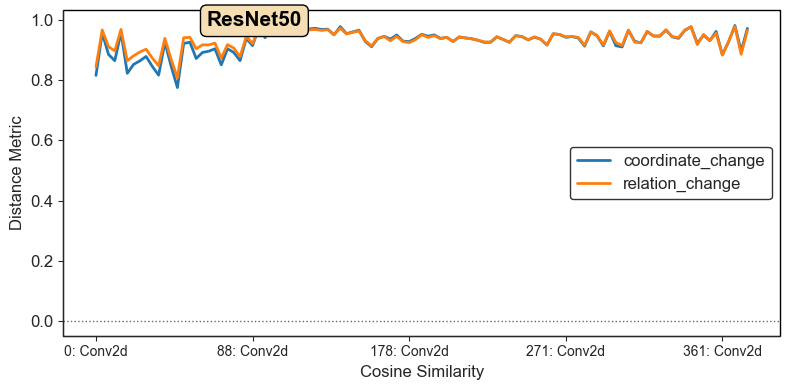

In [42]:
# You might want to skip the analysis of the very initial layer as their value is massive and out of range and, finally, uninteresting as too close to pixel level. Set `start_from` to something from [0, len(layers_names) - 1]
start_from = 0

plt.rcParams["svg.fonttype"] = "none"

sns.set_style("white")


conditions = [
    np.array(mean_distances.iloc[i])[start_from:] for i in range(len(mean_distances))
]
conditions_std = [
    np.array(mean_distances_std.iloc[i])[start_from:]
    for i in range(len(mean_distances))
]
layer_index_name = mean_distances.columns[start_from:]

x = range(len(conditions[0]))
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.axhline(y=0, linestyle=":", color="k", alpha=0.6, linewidth=1)

for idx, c in enumerate(conditions):
    plt.plot(x, c, label=mean_distances.index[idx], lw=2)

ax.set_xticks([])
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)

ax.patch.set_edgecolor("black")
ax.patch.set_linewidth(1)
sns.despine()
plt.legend(prop={"size": 12}, edgecolor=(0, 0, 0, 1))
plt.ylabel("Distance Metric", fontsize=12)
plt.xlabel("Network Depth", fontsize=12)
network_name = "ResNet50"
ax.annotate(
    network_name,
    color="k",
    xy=(0.2, 0.95),
    xycoords="axes fraction",
    size=15,
    fontweight="bold",
    bbox=dict(boxstyle="round", alpha=1, fc="wheat", ec="k"),
)
ax.tick_params(
    axis="y",
    left=True,
    labelbottom=True,
)
ax.tick_params(
    axis="x",
    bottom=True,
    labelbottom=True,
)
ax.set_xticks(x[::25], layer_index_name[::25], rotation=0)

plt.tight_layout()
[
    plt.savefig(
        str(pathlib.Path('../plots') / f"lineplot_comparion_level_all_layers.{ext}"),
        facecolor="white",
    )
    for ext in ["png", "svg"]
]

In [58]:
df[df["Id"] == 1]

,Unnamed: 0,ComparisonLevel,Id,TransformerRep,0: Conv2d,4: Conv2d,7: Conv2d,12: Conv2d,15: Conv2d,17: Conv2d,...,343: Conv2d,348: Conv2d,351: Conv2d,353: Conv2d,356: Conv2d,361: Conv2d,364: Conv2d,367: Conv2d,372: Conv2d,377: Linear
0,0,coordinate_change,1,0,0.740558,0.950526,0.862531,0.747375,0.939736,0.792849,...,0.967093,0.851845,0.923133,0.895579,0.929086,0.805837,0.898446,0.970109,0.861654,0.953858
1,1,coordinate_change,1,1,0.680428,0.919971,0.765189,0.679966,0.915072,0.652844,...,0.962359,0.851490,0.892334,0.838524,0.930176,0.759934,0.805271,0.969186,0.801673,0.974620
2,2,coordinate_change,1,2,0.751119,0.944242,0.842956,0.818381,0.946739,0.758268,...,0.984735,0.919650,0.941373,0.928906,0.967557,0.892794,0.916614,0.993601,0.894241,0.962138
3,3,coordinate_change,1,3,0.638908,0.924552,0.790500,0.705441,0.916833,0.688233,...,0.948640,0.837828,0.885526,0.874530,0.938994,0.769843,0.849927,0.973834,0.801010,0.972316
4,4,coordinate_change,1,4,0.732145,0.944989,0.852405,0.808622,0.945743,0.771682,...,0.973629,0.881252,0.926298,0.899650,0.918529,0.791047,0.905333,0.975206,0.795933,0.954734
5,5,coordinate_change,1,5,0.656878,0.921885,0.782602,0.697709,0.915571,0.680213,...,0.953151,0.828035,0.889744,0.838734,0.922030,0.762841,0.835275,0.961687,0.795963,0.963662
6,6,coordinate_change,1,6,0.766414,0.955763,0.883846,0.810636,0.952738,0.816439,...,0.970625,0.891737,0.936420,0.921920,0.952995,0.856165,0.903540,0.986765,0.861386,0.962313
7,7,coordinate_change,1,7,0.698942,0.932230,0.801833,0.722374,0.927962,0.699208,...,0.975872,0.882751,0.921516,0.882510,0.944195,0.799167,0.897002,0.981961,0.758489,0.905259
8,8,coordinate_change,1,8,0.702199,0.940542,0.833810,0.775780,0.938152,0.748363,...,0.975056,0.889567,0.915888,0.906350,0.974314,0.832498,0.887324,0.972681,0.868741,0.973928
9,9,coordinate_change,1,9,0.759496,0.947513,0.852954,0.834084,0.951312,0.765637,...,0.984284,0.932673,0.955620,0.935070,0.966838,0.874479,0.943387,0.990876,0.913097,0.980785


In [59]:
from statsmodels.stats.anova import AnovaRM

name_layer_used = layers_names[-2]

r = AnovaRM(
    data=df,
    depvar=name_layer_used,
    subject="Id",
    within=["ComparisonLevel"],
    aggregate_func="mean",
).fit()


print(r.anova_table)
type(r.anova_table)

                  F Value  Num DF  Den DF    Pr > F
ComparisonLevel  0.067314     1.0     5.0  0.805632


pandas.core.frame.DataFrame